# Training 
## Fast Food Only

This notebook finds the best parameters for each of the different classifiers that achieve the maximuma accuracy.

In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = pd.read_pickle('x.pkl')
y = pd.read_pickle('y.pkl')

# Pick Fast Food places only

In [3]:
x = pd.read_pickle('x.pkl')
y = pd.read_pickle('y.pkl')

In [4]:
df = x.copy()
df['is_closed'] = y
df = df[df['is_fastfood'] == True]
x = df.copy()
del x['is_closed']
y = df['is_closed'].copy()

# Train Test Split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10,\
                                                    stratify = y)

In [6]:
def train_and_test(clf=DecisionTreeClassifier()):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    try:
        result = dict()
        result['accuracy']  = clf.score(x_test, y_test)
        result['precision'] = precision_score(y_test, y_pred)
        result['recall']    = recall_score(y_test,y_pred)
        result['f1']        = f1_score(y_test.values,y_pred)
        result['matrix']    = confusion_matrix(y_test.values, y_pred)
        dt_scores = cross_val_score(clf, x_train, y_train, cv=10)
        result['cval_score'] = np.mean(dt_scores)
        result['score'] = clf.predict_proba(x_test)[:,1]
        try:
            result['imp_features'] = clf.feature_importances_
        except:
            result['imp_features'] = None
        return result
    except UndefinedMetricWarning:
        return None

# DECISION TREES

In [7]:
criterions = ['entropy', 'gini']
splitters = ['random', 'best']
depths = [5, 10, None]
min_samples_splits = [0.50, 0.25, 2]
min_samples_leafs = [1, 10]

In [8]:
results = []
for c, s, d, mss, msl in list(itertools.product(criterions, splitters, depths, min_samples_splits, min_samples_leafs)):
    clf = DecisionTreeClassifier(criterion=c, splitter=s, max_depth=d, min_samples_split=mss, min_samples_leaf=msl)
    result = train_and_test(clf)
    if result is not None:
        result['criterion'] = c
        result['splitter'] = s
        result['depth'] = d
        result['mss'] = mss
        result['msl'] = msl
        results.append(result)

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
tree_df = pd.DataFrame.from_dict(results)
tree_df.head()

,accuracy,criterion,cval_score,depth,f1,imp_features,matrix,msl,mss,precision,recall,score,splitter
0,0.903846,entropy,0.901095,5.0,0.0,"[0.0, 0.20870938961, 0.0, 0.0, 0.0, 0.16715895...","[[94, 0], [10, 0]]",1,0.50,0.000000,0.0,"[0.0888888888889, 0.0888888888889, 0.016949152...",random
1,0.903846,entropy,0.905857,5.0,0.0,"[0.0, 0.208137262431, 0.0, 0.0, 0.160033305388...","[[94, 0], [10, 0]]",10,0.50,0.000000,0.0,"[0.134502923977, 0.021978021978, 0.03125, 0.03...",random
2,0.903846,entropy,0.908296,5.0,0.0,"[0.0, 0.221472973767, 0.0, 0.0, 0.0, 0.1903447...","[[94, 0], [10, 0]]",1,0.25,0.000000,0.0,"[0.0936170212766, 0.0936170212766, 0.0, 0.0, 0...",random
3,0.903846,entropy,0.905857,5.0,0.0,"[0.0, 0.290513606127, 0.0, 0.0, 0.045834035627...","[[94, 0], [10, 0]]",10,0.25,0.000000,0.0,"[0.047619047619, 0.047619047619, 0.00806451612...",random
4,0.923077,entropy,0.881754,5.0,0.5,"[0.0, 0.115370696111, 0.204557824604, 0.0, 0.0...","[[92, 2], [6, 4]]",1,2.00,0.666667,0.4,"[0.0739436619718, 0.0739436619718, 0.0, 0.0739...",random


In [10]:
tree_df.loc[[tree_df['accuracy'].idxmax(), tree_df['precision'].idxmax(), tree_df['cval_score'].idxmax()]]

,accuracy,criterion,cval_score,depth,f1,imp_features,matrix,msl,mss,precision,recall,score,splitter
8,0.932692,entropy,0.900740,10.0,0.461538,"[0.0, 0.126448847468, 0.0, 0.0, 0.076944903341...","[[94, 0], [7, 3]]",1,0.25,1.0,0.3,"[0.0542635658915, 0.0140845070423, 0.0, 0.0, 0...",random
6,0.913462,entropy,0.903418,10.0,0.181818,"[0.0, 0.0, 0.0788919895567, 0.0, 0.0, 0.0, 0.0...","[[94, 0], [9, 1]]",1,0.50,1.0,0.1,"[0.125, 0.00980392156863, 0.08, 0.08, 0.009803...",random
59,0.903846,gini,0.910796,5.0,0.000000,"[0.0, 0.304430272391, 0.0184914224892, 0.01141...","[[94, 0], [10, 0]]",10,2.00,0.0,0.0,"[0.138888888889, 0.00975609756098, 0.009756097...",best


# RandomForestClassifier

In [11]:
n_estimators_list = [5, 10, 15, 20]
criterions = ['entropy', 'gini']
depths = [5, 10, None]
min_samples_splits = [0.50, 0.25, 2]
min_samples_leafs = [1, 10]

In [12]:
results = []
for nest, c, d, mss, msl in list(itertools.product(n_estimators_list, criterions, depths, min_samples_splits, min_samples_leafs)):
    clf = RandomForestClassifier(n_estimators=nest, criterion=c, max_depth=d, min_samples_split=mss, min_samples_leaf=msl)
    result = train_and_test(clf)
    if result is not None:
        result['n_estimators'] = nest
        result['criterion'] = c
        result['depth'] = d
        result['mss'] = mss
        result['msl'] = msl
        results.append(result)

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

In [13]:
rf_df = pd.DataFrame.from_dict(results)
rf_df.head()

,accuracy,criterion,cval_score,depth,f1,imp_features,matrix,msl,mss,n_estimators,precision,recall,score
0,0.903846,entropy,0.905857,5.0,0.0,"[0.0, 0.365588331233, 0.0, 0.0, 0.141055218203...","[[94, 0], [10, 0]]",1,0.50,5,0.0,0.0,"[0.0721264995665, 0.013624208304, 0.0721264995..."
1,0.903846,entropy,0.905857,5.0,0.0,"[0.0646864499277, 0.0, 0.0, 0.0, 0.0, 0.051525...","[[94, 0], [10, 0]]",10,0.50,5,0.0,0.0,"[0.0914434425224, 0.07229046606, 0.09144344252..."
2,0.903846,entropy,0.901037,5.0,0.0,"[0.0, 0.20373536822, 0.0, 0.0664696200181, 0.1...","[[94, 0], [10, 0]]",1,0.25,5,0.0,0.0,"[0.0815404236428, 0.0127730176811, 0.062013651..."
3,0.903846,entropy,0.905857,5.0,0.0,"[0.0, 0.216201570573, 0.0333247423341, 0.0, 0....","[[94, 0], [10, 0]]",10,0.25,5,0.0,0.0,"[0.107688229654, 0.00919117647059, 0.098950657..."
4,0.903846,entropy,0.903418,5.0,0.0,"[0.0131761171855, 0.108796294908, 0.0840811443...","[[94, 0], [10, 0]]",1,2.00,5,0.0,0.0,"[0.0612844987999, 0.0373925338282, 0.038803337..."


In [14]:
rf_df.loc[[rf_df['accuracy'].idxmax(), rf_df['precision'].idxmax(), rf_df['cval_score'].idxmax()]]

,accuracy,criterion,cval_score,depth,f1,imp_features,matrix,msl,mss,n_estimators,precision,recall,score
8,0.923077,entropy,0.905857,10.0,0.333333,"[0.0250415722363, 0.257582010943, 0.0749119173...","[[94, 0], [8, 2]]",1,0.25,5,1.0,0.2,"[0.150568835383, 0.0550633565699, 0.0745656441..."
8,0.923077,entropy,0.905857,10.0,0.333333,"[0.0250415722363, 0.257582010943, 0.0749119173...","[[94, 0], [8, 2]]",1,0.25,5,1.0,0.2,"[0.150568835383, 0.0550633565699, 0.0745656441..."
76,0.903846,entropy,0.910677,5.0,0.000000,"[0.0491792925331, 0.11389031559, 0.03172197714...","[[94, 0], [10, 0]]",1,2.00,15,0.0,0.0,"[0.0843660539272, 0.0152872502265, 0.101034021..."


# AdaBoost

In [15]:
base_estimators=[None, RandomForestClassifier()]
n_estimators_list=[10, 30, 50, 100, 200]
learning_rate=[0.1, 0.5, 1.0]

In [16]:
results = []
for est, nest, lr in list(itertools.product(base_estimators, n_estimators_list, learning_rate)):
    clf = AdaBoostClassifier(base_estimator=est, n_estimators=nest, learning_rate=lr)
    result = train_and_test(clf)
    if result is not None:
        result['n_estimators'] = nest
        result['base_estimator'] = est 
        result['lr'] = lr
        results.append(result)

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

In [17]:
adaboost_df = pd.DataFrame.from_dict(results)
adaboost_df.head()

,accuracy,base_estimator,cval_score,f1,imp_features,lr,matrix,n_estimators,precision,recall,score
0,0.903846,None,0.900979,0.000000,"[0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...",0.1,"[[94, 0], [10, 0]]",10,0.00,0.0,"[0.155832170894, 0.138908952835, 0.12425411682..."
1,0.913462,None,0.905801,0.181818,"[0.0, 0.4, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.1, ...",0.5,"[[94, 0], [9, 1]]",10,1.00,0.1,"[0.393266073892, 0.0151434340947, 0.0113596181..."
2,0.913462,None,0.913002,0.400000,"[0.0, 0.2, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.1, ...",1.0,"[[92, 2], [7, 3]]",10,0.60,0.3,"[0.421528992496, 0.0269860775272, 0.3388952149..."
3,0.913462,None,0.898539,0.181818,"[0.0, 0.466666666667, 0.0333333333333, 0.0, 0....",0.1,"[[94, 0], [9, 1]]",30,1.00,0.1,"[0.323403498587, 0.118015172459, 0.09160598052..."
4,0.923077,None,0.900923,0.428571,"[0.0, 0.166666666667, 0.0666666666667, 0.0, 0....",0.5,"[[93, 1], [7, 3]]",30,0.75,0.3,"[0.466944455829, 0.213110292574, 0.18161548836..."


In [18]:
adaboost_df.loc[[adaboost_df['accuracy'].idxmax(), adaboost_df['precision'].idxmax(), adaboost_df['cval_score'].idxmax()]]

,accuracy,base_estimator,cval_score,f1,imp_features,lr,matrix,n_estimators,precision,recall,score
4,0.923077,None,0.900923,0.428571,"[0.0, 0.166666666667, 0.0666666666667, 0.0, 0....",0.5,"[[93, 1], [7, 3]]",30,0.75,0.3,"[0.466944455829, 0.213110292574, 0.18161548836..."
1,0.913462,None,0.905801,0.181818,"[0.0, 0.4, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.1, ...",0.5,"[[94, 0], [9, 1]]",10,1.00,0.1,"[0.393266073892, 0.0151434340947, 0.0113596181..."
2,0.913462,None,0.913002,0.400000,"[0.0, 0.2, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.1, ...",1.0,"[[92, 2], [7, 3]]",10,0.60,0.3,"[0.421528992496, 0.0269860775272, 0.3388952149..."


# K-Nearest Neighbor
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [19]:
n_neighbors=[3, 5, 10, 20, 50]
leaf_size=[5, 10, 30, 50]
weights = ['uniform', 'distance']
ps=[1, 2]

In [20]:
results = []
for n, ls, w, p in list(itertools.product(n_neighbors, leaf_size, weights, ps)):
    clf = KNeighborsClassifier(n_neighbors=n, leaf_size=ls, weights=w, p=p)
    result = train_and_test(clf)
    if result is not None:
        result['n_neighbor'] = n
        result['leaf_size'] = ls
        result['p'] = p
        results.append(result)

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

In [21]:
knn_df = pd.DataFrame.from_dict(results)
knn_df.head()

,accuracy,cval_score,f1,imp_features,leaf_size,matrix,n_neighbor,p,precision,recall,score
0,0.903846,0.886751,0.0,None,5,"[[94, 0], [10, 0]]",3,1,0.0,0.0,"[0.0, 0.0, 0.333333333333, 0.0, 0.0, 0.0, 0.0,..."
1,0.903846,0.889132,0.0,None,5,"[[94, 0], [10, 0]]",3,2,0.0,0.0,"[0.0, 0.0, 0.333333333333, 0.0, 0.0, 0.0, 0.0,..."
2,0.894231,0.867172,0.0,None,5,"[[93, 1], [10, 0]]",3,1,0.0,0.0,"[0.0, 0.0, 0.319352807078, 0.0, 0.0, 0.0, 0.0,..."
3,0.903846,0.871992,0.0,None,5,"[[94, 0], [10, 0]]",3,2,0.0,0.0,"[0.0, 0.0, 0.380221086267, 0.0, 0.0, 0.0, 0.0,..."
4,0.903846,0.886751,0.0,None,10,"[[94, 0], [10, 0]]",3,1,0.0,0.0,"[0.0, 0.0, 0.333333333333, 0.0, 0.0, 0.0, 0.0,..."


In [22]:
knn_df.loc[[knn_df['accuracy'].idxmax(), knn_df['precision'].idxmax(), knn_df['cval_score'].idxmax()]]

,accuracy,cval_score,f1,imp_features,leaf_size,matrix,n_neighbor,p,precision,recall,score
0,0.903846,0.886751,0.0,None,5,"[[94, 0], [10, 0]]",3,1,0.0,0.0,"[0.0, 0.0, 0.333333333333, 0.0, 0.0, 0.0, 0.0,..."
0,0.903846,0.886751,0.0,None,5,"[[94, 0], [10, 0]]",3,1,0.0,0.0,"[0.0, 0.0, 0.333333333333, 0.0, 0.0, 0.0, 0.0,..."
16,0.894231,0.905915,0.0,None,5,"[[93, 1], [10, 0]]",5,1,0.0,0.0,"[0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, ..."


# Gaussian Naive Bayes
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [23]:
clf = GaussianNB()
result = train_and_test(clf)

In [24]:
nb_df = pd.DataFrame.from_dict([result])
nb_df.head()

,accuracy,cval_score,f1,imp_features,matrix,precision,recall,score
0,0.884615,0.848188,0.333333,None,"[[89, 5], [7, 3]]",0.375,0.3,"[0.0926998311156, 0.00743549079098, 1.12993411..."


In [25]:
nb_df.loc[[nb_df['accuracy'].idxmax(), nb_df['precision'].idxmax(), nb_df['cval_score'].idxmax()]]

,accuracy,cval_score,f1,imp_features,matrix,precision,recall,score
0,0.884615,0.848188,0.333333,None,"[[89, 5], [7, 3]]",0.375,0.3,"[0.0926998311156, 0.00743549079098, 1.12993411..."
0,0.884615,0.848188,0.333333,None,"[[89, 5], [7, 3]]",0.375,0.3,"[0.0926998311156, 0.00743549079098, 1.12993411..."
0,0.884615,0.848188,0.333333,None,"[[89, 5], [7, 3]]",0.375,0.3,"[0.0926998311156, 0.00743549079098, 1.12993411..."


---

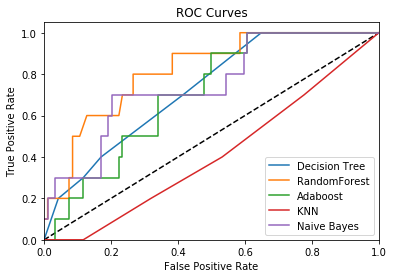

In [26]:
#ROC Curve
y_score_tree = tree_df.loc[51, 'score']
y_score_rf = rf_df.loc[97, 'score']
y_score_ab = adaboost_df.loc[20, 'score']
y_score_knn = knn_df.loc[56, 'score']
y_score_nb = nb_df.loc[0, 'score']
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test,y_score_rf)
fpr_ab, tpr_ab, _ = roc_curve(y_test,y_score_ab)
fpr_knn, tpr_knn, _ = roc_curve(y_test,y_score_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_test,y_score_nb)
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr_tree,tpr_tree,label='Decision Tree')
plt.plot(fpr_rf,tpr_rf,label='RandomForest')
plt.plot(fpr_ab,tpr_ab,label='Adaboost')
plt.plot(fpr_knn,tpr_knn,label='KNN')
plt.plot(fpr_nb,tpr_nb,label='Naive Bayes')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [27]:
importances = dict()
importances['tree'] = tree_df.loc[51, 'imp_features']
importances['rf'] = rf_df.loc[97, 'imp_features']
importances['ab'] = adaboost_df.loc[20, 'imp_features']
importances['knn'] = knn_df.loc[56, 'imp_features']
importances['nb'] = nb_df.loc[0, 'imp_features']

for k, imp in importances.items():
    if imp is None:
        continue
    indices = np.argsort(imp)[::-1]
    print("Feature ranking: {}".format(k))
    for f in range(20):
        print("%d. %s (%f)" % (f + 1, x.iloc[:,indices[f]].name, imp[indices[f]]))

Feature ranking: tree
1. is_chain (0.663572)
2. 3m_count_similar (0.101434)
3. 2m_count (0.062066)
4. review_count (0.051550)
5. GoodForMeal.latenight (0.047433)
6. 1m_count (0.041118)
7. GoodForMeal.breakfast (0.032827)
8. Ambience.touristy (0.000000)
9. Ambience.romantic (0.000000)
10. Ambience.intimate (0.000000)
11. Ambience.hipster (0.000000)
12. Ambience.divey (0.000000)
13. Ambience.classy (0.000000)
14. Ambience.casual (0.000000)
15. Alcohol (0.000000)
16. cuisine_y (0.000000)
17. income (0.000000)
18. Ambience.upscale (0.000000)
19. price_ordinal (0.000000)
20. is_fastfood (0.000000)
Feature ranking: rf
1. review_count (0.195022)
2. 1m_count_similar (0.155157)
3. 3m_count_similar (0.133333)
4. is_chain (0.118173)
5. income (0.107694)
6. Ambience.casual (0.082137)
7. 2m_count_similar (0.075361)
8. 0.5m_count_similar (0.056352)
9. GoodForMeal.breakfast (0.039331)
10. 3m_count (0.021356)
11. GoodForMeal.lunch (0.004351)
12. cuisine_y (0.003917)
13. rating (0.003320)
14. GoodForMe

TypeError: unhashable type: 'numpy.ndarray'

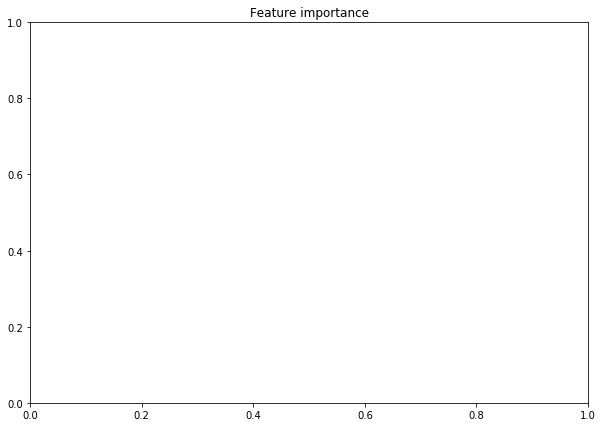

In [28]:
plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(x_test.shape[1])[:10], importances[indices][:10],align="center")
plt.yticks(range(x_test.shape[1])[:10], x.iloc[:,indices].columns)
plt.ylim([-1, 10])